# Color spaces lab

We need to get familier with colorspaces, channel slicing, and single channels changes.

---

## Task 1

In the carkyo image use the HSV colorspace to:
- Add 10 to all S channel values.
- Subtract 5 from H channel.
- Myltiply V channel by 1.25.
- Save image again in BGR.
- Describe the results in your words.
  - What is the effect of each change?
  - What problem did you face and how you fixed it?

## Task 2

- Create YCrCb image.
- Multiply Y channel by 1.25 in YCrCb colorspace.
- Describe the result.

---

## Grade

- 15
  - 10 for HSV task.
  - 3 for YCrCb task.
  - 2 for finishing within the lab time.

---

## Output should be like this:

### HSV
![Image](Files/output/hsv.png)

### YCrCb
![Image](Files/output/yCrCb.png)

# Task (1)

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from PIL import Image

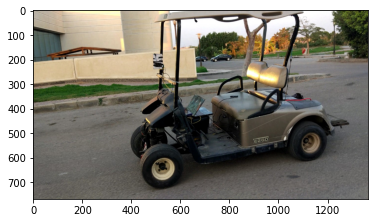

In [9]:
img = cv2.imread('Files/001.jpg')
img_copy = img.copy()
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.imshow(img_copy)

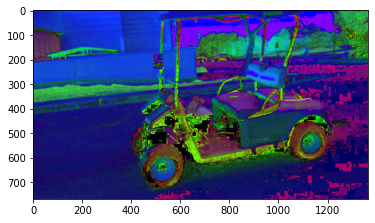

In [10]:
img = cv2.imread('Files/001.jpg')
img_hsv = img.copy()
img_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

In [31]:
print(np.max(img_hsv[:,:,0]))
print(np.min(img_hsv[:,:,0]))
print(np.max(img_hsv[:,:,1]))
print(np.min(img_hsv[:,:,1]))
print(np.max(img_hsv[:,:,2]))
print(np.min(img_hsv[:,:,2]))


179
0
255
0
255
0


In [11]:
h = img_hsv[:,:,0]
s = img_hsv[:,:,1]
v = img_hsv[:,:,2]

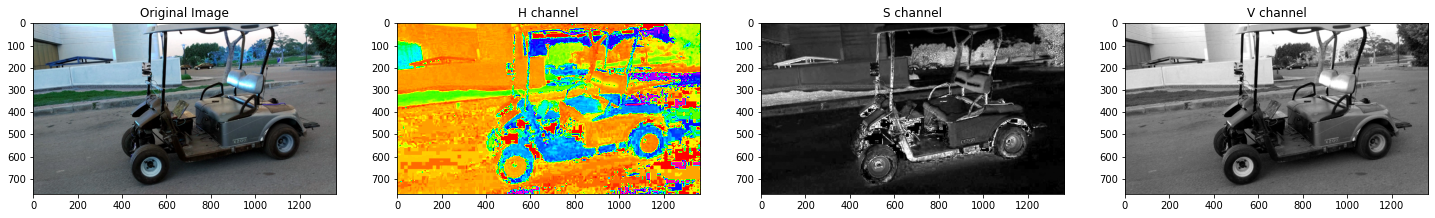

In [12]:
cmapA = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","red"])
cmapB = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blue","yellow"])

# Visualize the individual color channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,20))
ax1.set_title('Original Image')
ax1.imshow(img)
ax2.set_title('H channel')
ax2.imshow(h, cmap='hsv')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

## 1) Add 10 to all S channel values

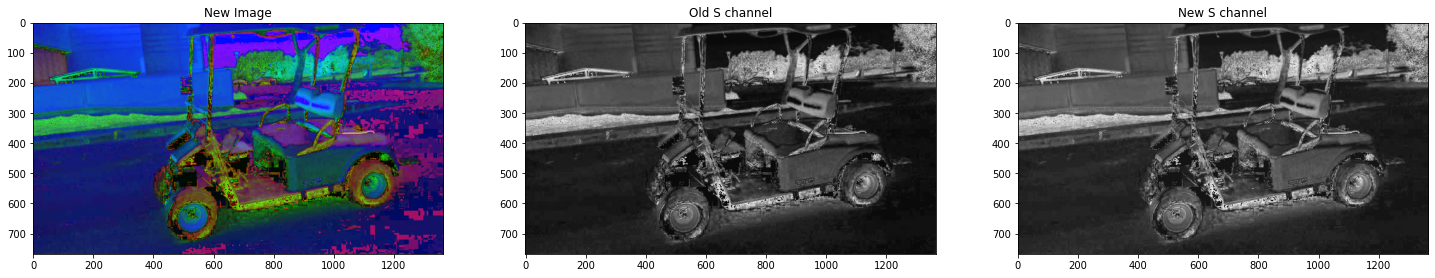

In [51]:
img_hsv[:,:,1] = img_hsv[:,:,1] + 10 
s2 = s + 10
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,20))
ax1.set_title('New Image')
ax1.imshow(img_hsv)
ax2.set_title('Old S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('New S channel')
plt.imshow(s2, cmap='gray')


In [52]:
print(np.max(new_img[:,:,0]))
print(np.min(new_img[:,:,0]))
print(np.max(new_img[:,:,1]))
print(np.min(new_img[:,:,1]))
print(np.max(new_img[:,:,2]))
print(np.min(new_img[:,:,2]))

179
0
255
0
255
0


## 2) Subtract 5 from H channel


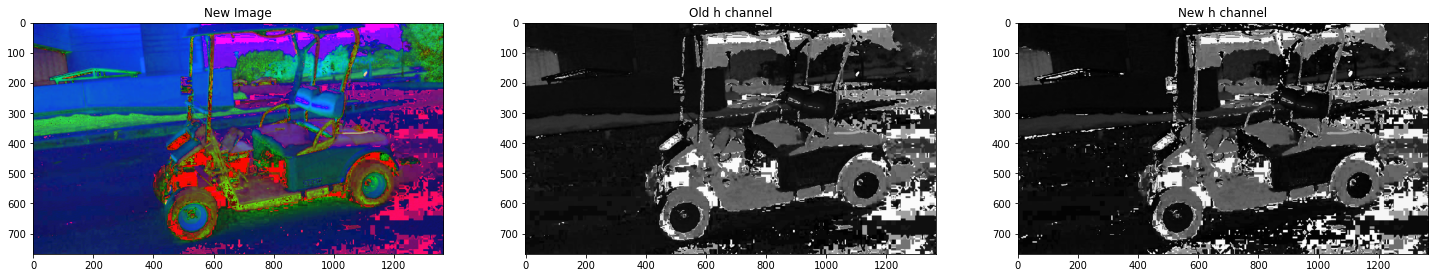

In [53]:
img_hsv[:,:,0] = img_hsv[:,:,0] - 5
h2 = h - 5 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,20))
ax1.set_title('New Image')
ax1.imshow(img_hsv,cmap='hsv')
ax2.set_title('Old h channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('New h channel')
plt.imshow(h2, cmap='gray')


In [54]:
print(np.max(new_img2[:,:,0]))
print(np.min(new_img2[:,:,0]))
print(np.max(new_img2[:,:,1]))
print(np.min(new_img2[:,:,1]))
print(np.max(new_img2[:,:,2]))
print(np.min(new_img2[:,:,2]))

179
0
255
0
255
0


## 3) Myltiply V channel by 1.25

- problem: range of v channel > 255 

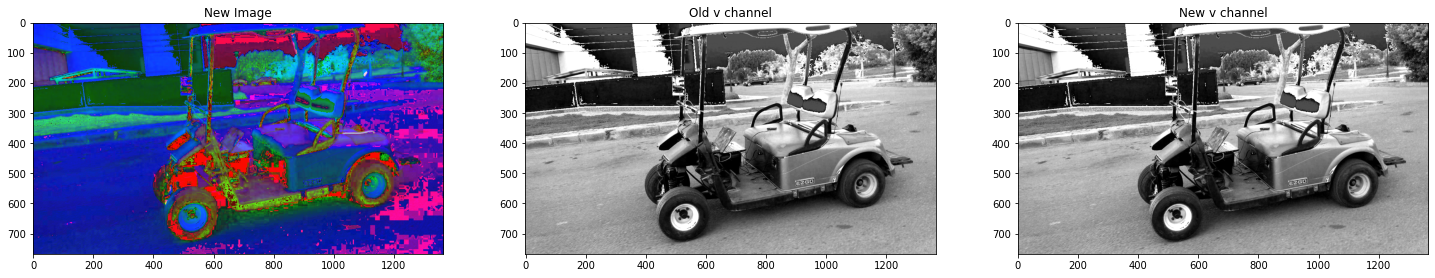

In [59]:
img_hsv[:,:,2] = np.clip((img_hsv[:,:,2] * 1.25),0,255)
v2 = v * 1.25 
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,20))
ax1.set_title('New Image')
ax1.imshow(img_hsv,cmap = 'hsv')
ax2.set_title('Old v channel')
ax2.imshow(v, cmap='gray')
ax3.set_title('New v channel')
plt.imshow(v2, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


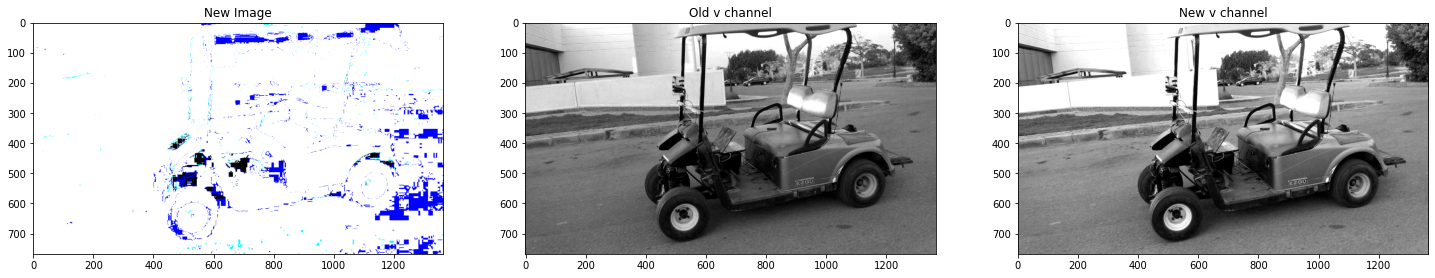

In [46]:
v2 = v * 1.25 
# clip v range (0->255)
v2 = np.clip(v2,0,255)
new_img3 = np.dstack((h,s,v2))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,20))
ax1.set_title('New Image')
ax1.imshow(new_img3,cmap = 'hsv')
ax2.set_title('Old v channel')
ax2.imshow(v, cmap='gray')
ax3.set_title('New v channel')
plt.imshow(v2, cmap='gray')

In [47]:
print(np.max(new_img3[:,:,0]))
print(np.min(new_img3[:,:,0]))
print(np.max(new_img3[:,:,1]))
print(np.min(new_img3[:,:,1]))
print(np.max(new_img3[:,:,2]))
print(np.min(new_img3[:,:,2]))

179.0
0.0
255.0
0.0
255.0
0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


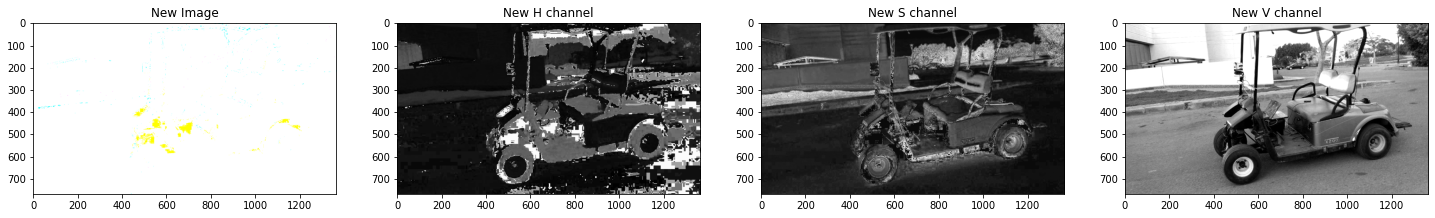

In [48]:
# compare new_hsv to old_hsv
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(25,20))
new_hsv = np.dstack((h2,s2,v2))
#new image
ax1.set_title('New Image')
ax1.imshow(new_hsv,cmap = 'hsv')
ax2.set_title('New H channel')
ax2.imshow(h2, cmap='gray')
ax3.set_title('New S channel')
ax3.imshow(s2, cmap='gray')
ax4.set_title('New V channel')
ax4.imshow(v2, cmap='gray')


In [61]:
new_hsv.shape

(768, 1365, 3)

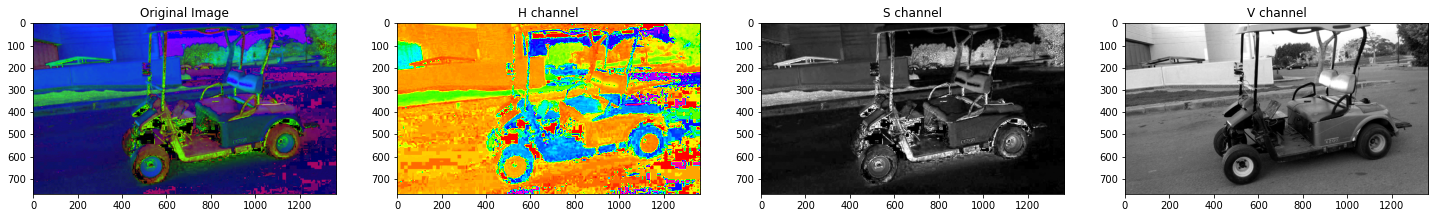

In [49]:
#old image
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,20))
ax1.set_title('Original Image')
ax1.imshow(img_hsv)
ax2.set_title('H channel')
ax2.imshow(h, cmap='hsv')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [50]:
#new_bgr = cv2.cvtColor(new_hsv, cv2.COLOR_HSV2BGR)
print(np.max(new_hsv[:,:,0]))
print(np.min(new_hsv[:,:,0]))
print(np.max(new_hsv[:,:,1]))
print(np.min(new_hsv[:,:,1]))
print(np.max(new_hsv[:,:,2]))
print(np.min(new_hsv[:,:,2]))


255.0
0.0
255.0
0.0
255.0
0.0


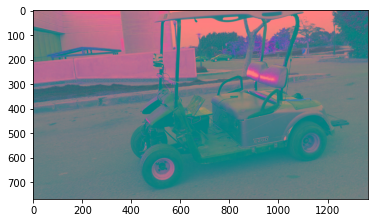

In [62]:
yCrCb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2YCrCb)
plt.imshow(yCrCb)

In [63]:
print(np.max(yCrCb[:,:,0]))
print(np.min(yCrCb[:,:,0]))
print(np.max(yCrCb[:,:,1]))
print(np.min(yCrCb[:,:,1]))
print(np.max(yCrCb[:,:,2]))
print(np.min(yCrCb[:,:,2]))


255
0
149
47
196
103


In [65]:
yCrCb[:,:,0] = yCrCb[:,:,0] * 1.25 

In [66]:
print(np.max(yCrCb[:,:,0]))
print(np.min(yCrCb[:,:,0]))

255
0
